Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

Neural Network Implementation

In [2]:
class NeuralNetwork:
    def __init__(self):
        self.input_neuron = 2
        self.hidden1_neuron = 16
        self.hidden2_neuron = 8
        self.hidden3_neuron = 40
        self.output_neuron = 3

        self.learning_rate = 0.001
        self.W_H1_input = np.random.randn(self.input_neuron, self.hidden1_neuron)
        self.W_H2_input = np.random.randn(self.hidden1_neuron, self.hidden2_neuron)
        self.W_H3_input = np.random.randn(self.hidden2_neuron, self.hidden3_neuron)
        self.W_O_input = np.random.randn(self.hidden3_neuron, self.output_neuron)

    def reLU(self, x, der=False):
        if der:
            return np.where(x > 0, 1, 0)
        else:
            return np.maximum(0, x)

    def softmax(self, x, der=False):
        if der:
            return np.ones_like(x)
        else:
            exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
            return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def feedforward(self, X):
        hidden1_input = np.dot(X, self.W_H1_input)
        self.hidden1_output = self.reLU(hidden1_input)

        hidden2_input = np.dot(self.hidden1_output, self.W_H2_input)
        self.hidden2_output = self.reLU(hidden2_input)

        hidden3_input = np.dot(self.hidden2_output, self.W_H3_input)
        self.hidden3_output = self.reLU(hidden3_input)

        output_input = np.dot(self.hidden3_output, self.W_O_input)
        prediction = self.softmax(output_input)

        return prediction

    def backpropagation(self, X, Y, prediction):
        output_error = Y - prediction
        output_delta = self.learning_rate * output_error * self.softmax(prediction, der=True)

        hidden3_error = output_delta.dot(self.W_O_input.T)
        hidden3_delta = self.learning_rate * hidden3_error * self.reLU(self.hidden3_output, der=True)

        hidden2_error = hidden3_delta.dot(self.W_H3_input.T)
        hidden2_delta = self.learning_rate * hidden2_error * self.reLU(self.hidden2_output, der=True)

        hidden1_error = hidden2_delta.dot(self.W_H2_input.T)
        hidden1_delta = self.learning_rate * hidden1_error * self.reLU(self.hidden1_output, der=True)

        self.W_H1_input += X.T.dot(hidden1_delta)
        self.W_H2_input += self.hidden1_output.T.dot(hidden2_delta)
        self.W_H3_input += self.hidden2_output.T.dot(hidden3_delta)
        self.W_O_input += self.hidden3_output.T.dot(output_delta)

    def train(self, X, Y):
        output = self.feedforward(X)
        self.backpropagation(X, Y, output)



Load Dataset and Plot

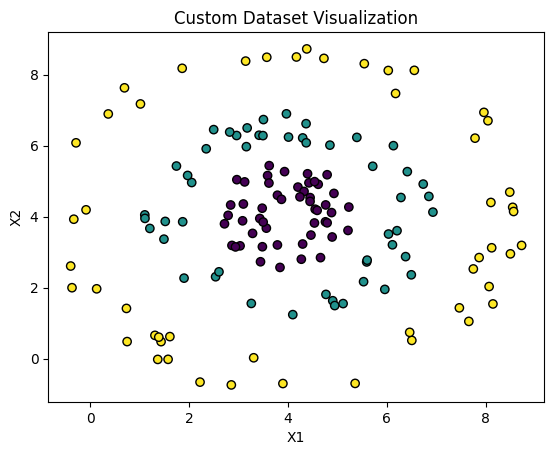

In [3]:
try:
    data = pd.read_csv('Assignment_2.csv')
except FileNotFoundError:
    print("Error: File 'Assignment_2.csv' not found. Ensure it is in the correct directory.")
    exit()

X = data[['X1', 'X2']].values
Y = data['Class'].values


encoder = OneHotEncoder(sparse_output=False)
Y_onehot = encoder.fit_transform(Y.reshape(-1, 1))

plt.scatter(X[:, 0], X[:, 1], c=Y, cmap="viridis", edgecolor="k")
plt.title("Custom Dataset Visualization")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()


Train Neural Network

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_onehot, test_size=0.2, random_state=42)

NN = NeuralNetwork()
epochs = 1000
for epoch in range(epochs):
    NN.train(X_train, Y_train)



Plot Decision Boundary

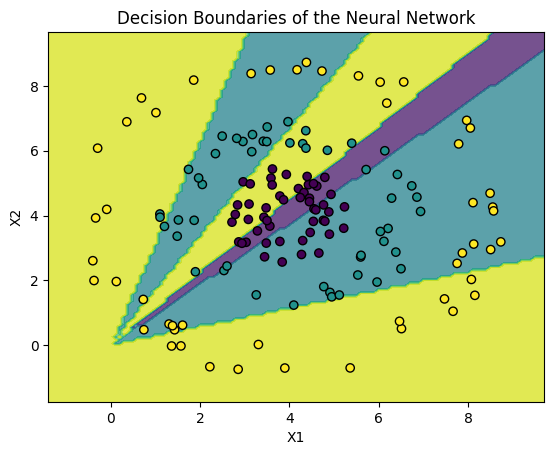

In [5]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

try:
    Z = NN.feedforward(np.c_[xx.ravel(), yy.ravel()])
except ValueError as e:
    print("Error during prediction. Ensure input dimensions match network expectations:", e)
    exit()

Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)


plt.contourf(xx, yy, Z, alpha=0.75, cmap="viridis")
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap="viridis", edgecolor="k")
plt.title("Decision Boundaries of the Neural Network")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()